### Project music - basic spotify ML stuff

In this notebook, I demonstrate how SVMs alongside audio features can be used to classify songs into categories.

In [2]:
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from statistics import mean
# https://developer.spotify.com/documentation/web-api/reference/get-audio-features
# in case any seem relevant
# spotify api credentials (should really keep these private but its alright i think - just dont share)
client_id = "5234f662dc954d598c3f8d9959f6bbaf"
client_secret = "97d9c0c5d85e416d826c67bdefa75dda"


client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spoti = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# url of the playlist in question, can change into an input type thing whatever
# put your playlist here
playlist_url1 = 'https://open.spotify.com/playlist/27Zm1P410dPfedsdoO9fqm'
playlist_url2 = 'https://open.spotify.com/playlist/37i9dQZF1DX76Wlfdnj7AP'




def get_playlist_tracks_with_audio_features(playlist_url1):
    playlist_id1 = playlist_url1.split('/')[-1]
    #get the url id which in this case would be whats after the final slash
    results = spoti.playlist_tracks(playlist_id1)
    playlist_data = {}

    for track in results['items']:
        track_name = track['track']['name']
        track_id = track['track']['id']

        audio_features = spoti.audio_features(track_id)

        if audio_features:
            playlist_data[track_name] = audio_features[0]

    return playlist_data


playlist_data1 = get_playlist_tracks_with_audio_features(playlist_url1)
playlist_data2 = get_playlist_tracks_with_audio_features(playlist_url2)
#print playlist tracks and audio features
audio_feats_for_each_track = {}
mean_relevant_data = {}
tracks = []
means = []
#print(playlist_data)
def get_mean_value(playlist_data, audio_feature):
    all_feats = []
    for track_name, audio_features in playlist_data.items():
        playlist_feat = audio_features[audio_feature]
        all_feats.append(playlist_feat)
    return sum(all_feats)/len(all_feats)

def get_scatter(playlist_data, audio_feature1, audio_feature2):
    feat1 = []
    feat2 = []
    for track_name, audio_features in playlist_data.items():
        playlist_feat1 = audio_features[audio_feature1]
        playlist_feat2 = audio_features[audio_feature2]
        feat1.append(playlist_feat1)
        feat2.append(playlist_feat2)

    return [feat1,feat2]

#def get_4scatter

"""
feature = input("feature?: ")
print("Mean value for playlist 1: "+str(get_mean_value(playlist_data1, feature)))
print("Mean value for playlist 2: "+str(get_mean_value(playlist_data2, feature)))
"""

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 6.3 MB/s eta 0:00:00


'\nfeature = input("feature?: ")\nprint("Mean value for playlist 1: "+str(get_mean_value(playlist_data1, feature)))\nprint("Mean value for playlist 2: "+str(get_mean_value(playlist_data2, feature)))\n'

Short notebook about SVMs and audio features.


In [3]:
!pip install spotipy

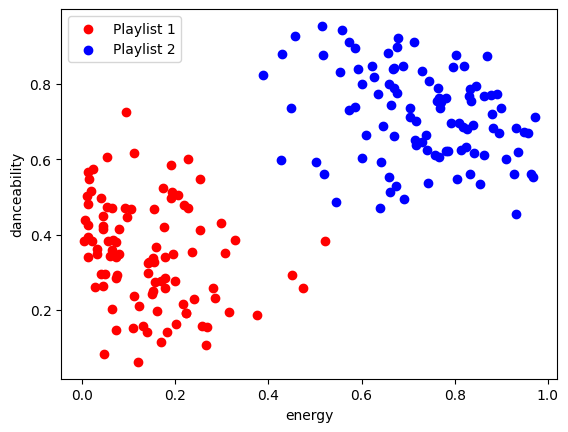

In [4]:
import matplotlib.pyplot as plt

x_feature = 'energy'
y_feature = 'danceability'

scatter1 = get_scatter(playlist_data1,x_feature,y_feature)
scatter2 = get_scatter(playlist_data2, x_feature,y_feature)

plt.scatter(scatter1[0], scatter1[1], color='red', label='Playlist 1')
plt.scatter(scatter2[0], scatter2[1], color='blue', label='Playlist 2')

# Adding labels and legend
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend()

# Display the plot
plt.show()

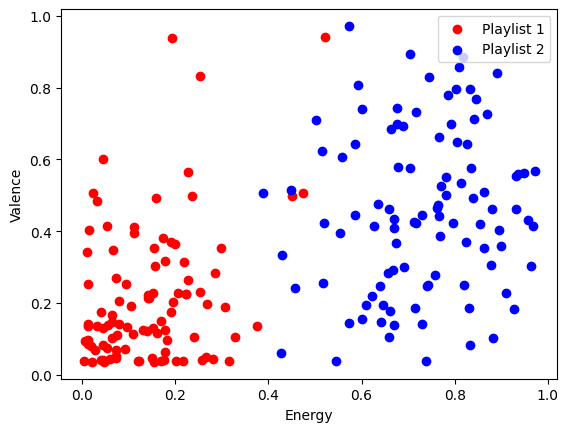

In [5]:
import matplotlib.pyplot as plt

scatter1 = get_scatter(playlist_data1,'energy','valence')
scatter2 = get_scatter(playlist_data2, 'energy','valence')

plt.scatter(scatter1[0], scatter1[1], color='red', label='Playlist 1')
plt.scatter(scatter2[0], scatter2[1], color='blue', label='Playlist 2')

# Adding labels and legend
plt.xlabel('Energy')
plt.ylabel('Valence')
plt.legend()


# Available spotify audio features

* acousticness
* danceability
* duration_ms
* energy
* id
* instrumentalness
* key
* liveness
* loudness
* mode
* speechiness
* tempo
* time_signature
* track_href
* type
* uri
* valence


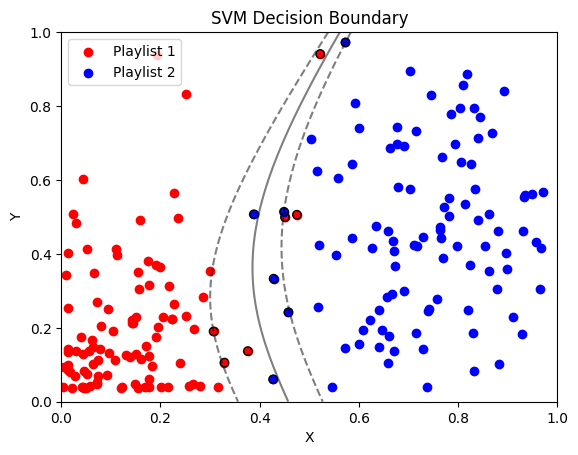

In [6]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

# Data
x_a = np.array(scatter1[0])
y_a = np.array(scatter1[1])

x_b = np.array(scatter2[0])
y_b = np.array(scatter2[1])

# Create feature matrix X and labels Y
X = np.vstack((np.column_stack((x_a, y_a)), np.column_stack((x_b, y_b))))
Y = np.hstack((np.zeros(len(x_a)), np.ones(len(x_b))))

# Create an SVM model
svm_model = svm.SVC(kernel='poly', C=1.0)

# Train the model
svm_model.fit(X, Y)

# Plotting decision boundary
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points
plt.scatter(x_a, y_a, color='red', label='Playlist 1')
plt.scatter(x_b, y_b, color='blue', label='Playlist 2')

# Plot the decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], facecolors='none', edgecolors='k', marker='o')

# Labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('SVM Decision Boundary')

# Show the plot
plt.show()

In [7]:
new_data_point = np.array([[0.8, 0.0]])
#we can predict which playlist an arbitrary song belongs in using this.
predicted_class = svm_model.predict(new_data_point)
class_labels = ['Playlist_1', 'Playlist_2']
predicted_class_label = class_labels[int(predicted_class)]
print(f'The predicted class for {new_data_point} is: {predicted_class_label}')

The predicted class for [[0.8 0. ]] is: Playlist_2


<ipython-input-7-06b3677e4d26>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(predicted_class)]
